In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
# from numba import njit

In [5]:
WN = np.loadtxt('W_avg.csv') ### not symmetric!!
Cave = np.loadtxt('Cave.csv')
pop = np.loadtxt('pop_new.csv')

In [6]:
num_fips = len(pop)
T = 60
num_ens = 300
Z = 3 # latent period
Zb = 1 # scale parameter for Z
D = 5 # infectious period
Db = 1 # scale parameter for b
alpha = 0.1 # reporting rate 10%

In [5]:
# seeding
l0 = 1859-1 # start with New York County NY in python -1, in matlab is 1859
i0 = 100 ## the starting t=0, in matlab it is 1
initials = (l0,i0)

In [7]:
R0=2.

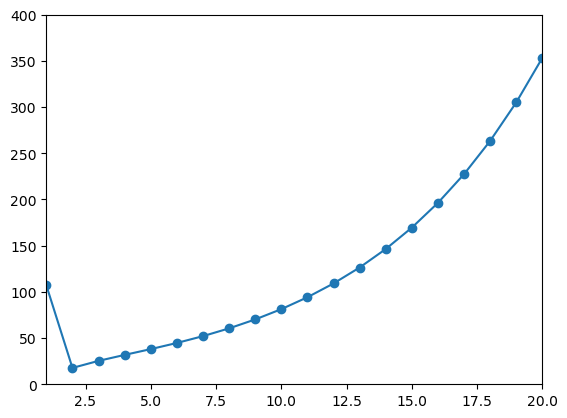

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R0 = 2.5
Z = 3
D = 5
N = 1e8
E0 = 100

T = 30

NewInf = np.zeros(T)
NewInf[0] = E0

x = np.array([N-E0, E0, 0])  # S, E, I

dt = 0.01

for t in range(T):
    for _ in range(int(1/dt)):
        xnew = x.copy()
        NewInf[t] += ((R0/D * x[0] * x[2] / N) * dt)
        xnew[0] = xnew[0] - ((R0/D * x[0] * x[2] / N) * dt)
        xnew[1] = xnew[1] + ((R0/D * x[0] * x[2] / N) * dt) - (x[1] / Z * dt)
        xnew[2] = xnew[2] + (x[1] / Z * dt) - (x[2] / D * dt)
        x = xnew

plt.plot(range(1, T+1), NewInf, '-o')
plt.xlim([1,20])
plt.ylim([0,400])
plt.show()


In [204]:
R0/D

0.5

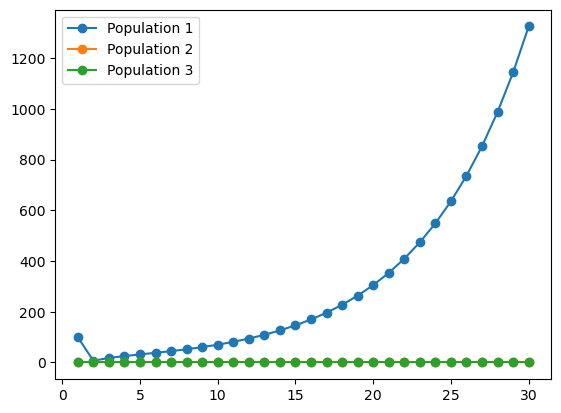

In [280]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R0 = 2.5
Z = 3
D = 5
N = np.array([1e8, 1e8, 1e8])  # Three populations of equal size
E0 = 100


n = 3  # number of locations
map_arr = [] # create a idx list to exclude the locations of flowin

for i in range(n):
    indices = list(range(n))
    indices.remove(i)
    map_arr.append(indices)

map_arr = np.array(map_arr)

T = 30

NewInf = np.zeros((3, T))
NewInf[0, 0] = E0

x = np.zeros((3, 3))  # S, E, I for three populations
x[0, 0] = N[0] - E0  # Susceptibles
x[1:,0] = N[1:]
x[0, 1] = E0  # Exposed


# Mobility matrix
M = np.array([
    [0., 0., 0.], ### flowin to 0
    [0., 0.0, 0.00], ### columm flowout from 0
    [0., 0.00, 0.0]
])

dt = 0.01

for t in range(1, T):  # Starting from 1 because we already initialized NewInf at time 0
    for _ in range(int(1 / dt)):
        xnew = x.copy()
        infection = (R0 / D * x[:, 0] * x[:, 2] / N) * dt
#         print(x)
#         print((R0 / D * x[:, 0] * x[:, 2] / N) * dt)
#         print(infection)
        NewInf[:, t] += infection
        
        migration_outflow = (np.sum(M,axis=0) - np.diag(M))[:,None] * x ### sum up the prob and then sum the value
#         migration_inflow = np.einsum('ij,ijk->ik', M[map_arr, np.arange(3)[:, None]], x[map_arr])
        migration_inflow = np.einsum('ij,ijk->ik', M[np.arange(3)[:, None], map_arr], x[map_arr])
        
        xnew[:, 0] = xnew[:, 0] - infection + migration_inflow[:, 0] - migration_outflow[:, 0]
        xnew[:, 1] = xnew[:, 1] + infection - (x[:, 1] / Z * dt) + migration_inflow[:, 1] - migration_outflow[:, 1]
        xnew[:, 2] = xnew[:, 2] + (x[:, 1] / Z * dt) - (x[:, 2] / D * dt) + migration_inflow[:, 2] - migration_outflow[:, 2]
        x = xnew

plt.plot(range(1, T+1), NewInf[0, :], '-o', label='Population 1')
plt.plot(range(1, T+1), NewInf[1, :], '-o', label='Population 2')
plt.plot(range(1, T+1), NewInf[2, :], '-o', label='Population 3')
plt.legend()
plt.show()


In [8]:
%run ../codes/SEIR_M.py

In [11]:
NewInf = SEIR_M(params=[2.1,3,5], pop=pop, initials=[1859-1,100], M=WN, T=60, dt=1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [12]:
np.savetxt('metapop_R021.csv',NewInf)

In [289]:
infec_perpop = NewInf/pop[:,None]*100000

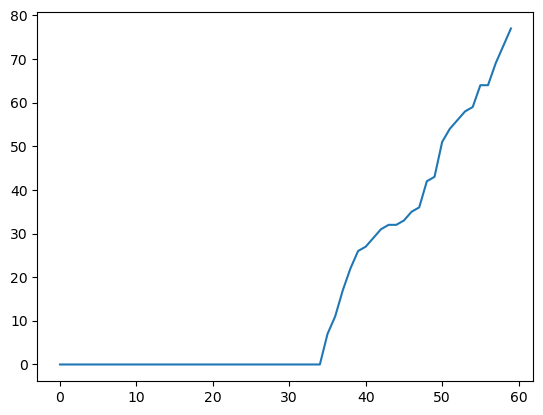

In [291]:
plt.plot(np.sum(infec_perpop>10,axis=0))